# Prepare a model for glass classification using KNN

# 2) KNN Glass_DataSet 

## import required lib

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report
import numpy as np

## import dataset

In [2]:
glass_data=pd.read_csv("D:\\Sandesh\\Data Science\\Homework Assignment\\Machine Learning\\KNN\\Glass.csv")
glass_data

RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Type
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0     1
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0     1
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0     1
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0     1
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0     1
..       ...    ...   ...   ...    ...   ...   ...   ...  ...   ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0     7
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0     7
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0     7
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0     7
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0     7

[214 rows x 10 columns]

In [3]:
#Data Description:
#RI : refractive index
#Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
#Mg: Magnesium
#AI: Aluminum
#Si: Silicon
#K:Potassium
#Ca: Calcium
#Ba: Barium
#Fe: Iron
#Type: Type of glass: (class attribute)
# 1 -- building_windows_float_processed
# 2 --building_windows_non_float_processed
# 3 --vehicle_windows_float_processed
# 4 --vehicle_windows_non_float_processed (none in this database)
# 5 --containers
# 6 --tableware
# 7 --headlamps

### Initial analysis

In [4]:
glass_data.shape

(214, 10)

In [5]:
glass_data.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [6]:
glass_data.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [7]:
glass_data[glass_data.duplicated()]

RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
39  1.52213  14.21  3.82  0.47  71.77  0.11  9.57  0.0  0.0     1

In [8]:
glass_data = glass_data.drop_duplicates().reset_index(drop = True)
glass_data

RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Type
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0     1
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0     1
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0     1
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0     1
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0     1
..       ...    ...   ...   ...    ...   ...   ...   ...  ...   ...
208  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0     7
209  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0     7
210  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0     7
211  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0     7
212  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0     7

[213 rows x 10 columns]

In [9]:
glass_data.mean()

RI       1.518348
Na      13.404085
Mg       2.679202
Al       1.449484
Si      72.655070
K        0.498873
Ca       8.954085
Ba       0.175869
Fe       0.057277
Type     2.788732
dtype: float64

In [10]:
glass_data.std()

RI      0.003033
Na      0.816662
Mg      1.443691
Al      0.495925
Si      0.773998
K       0.653185
Ca      1.425882
Ba      0.498245
Fe      0.097589
Type    2.105130
dtype: float64

In [11]:
glass_data['Type'].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

## Visualization 

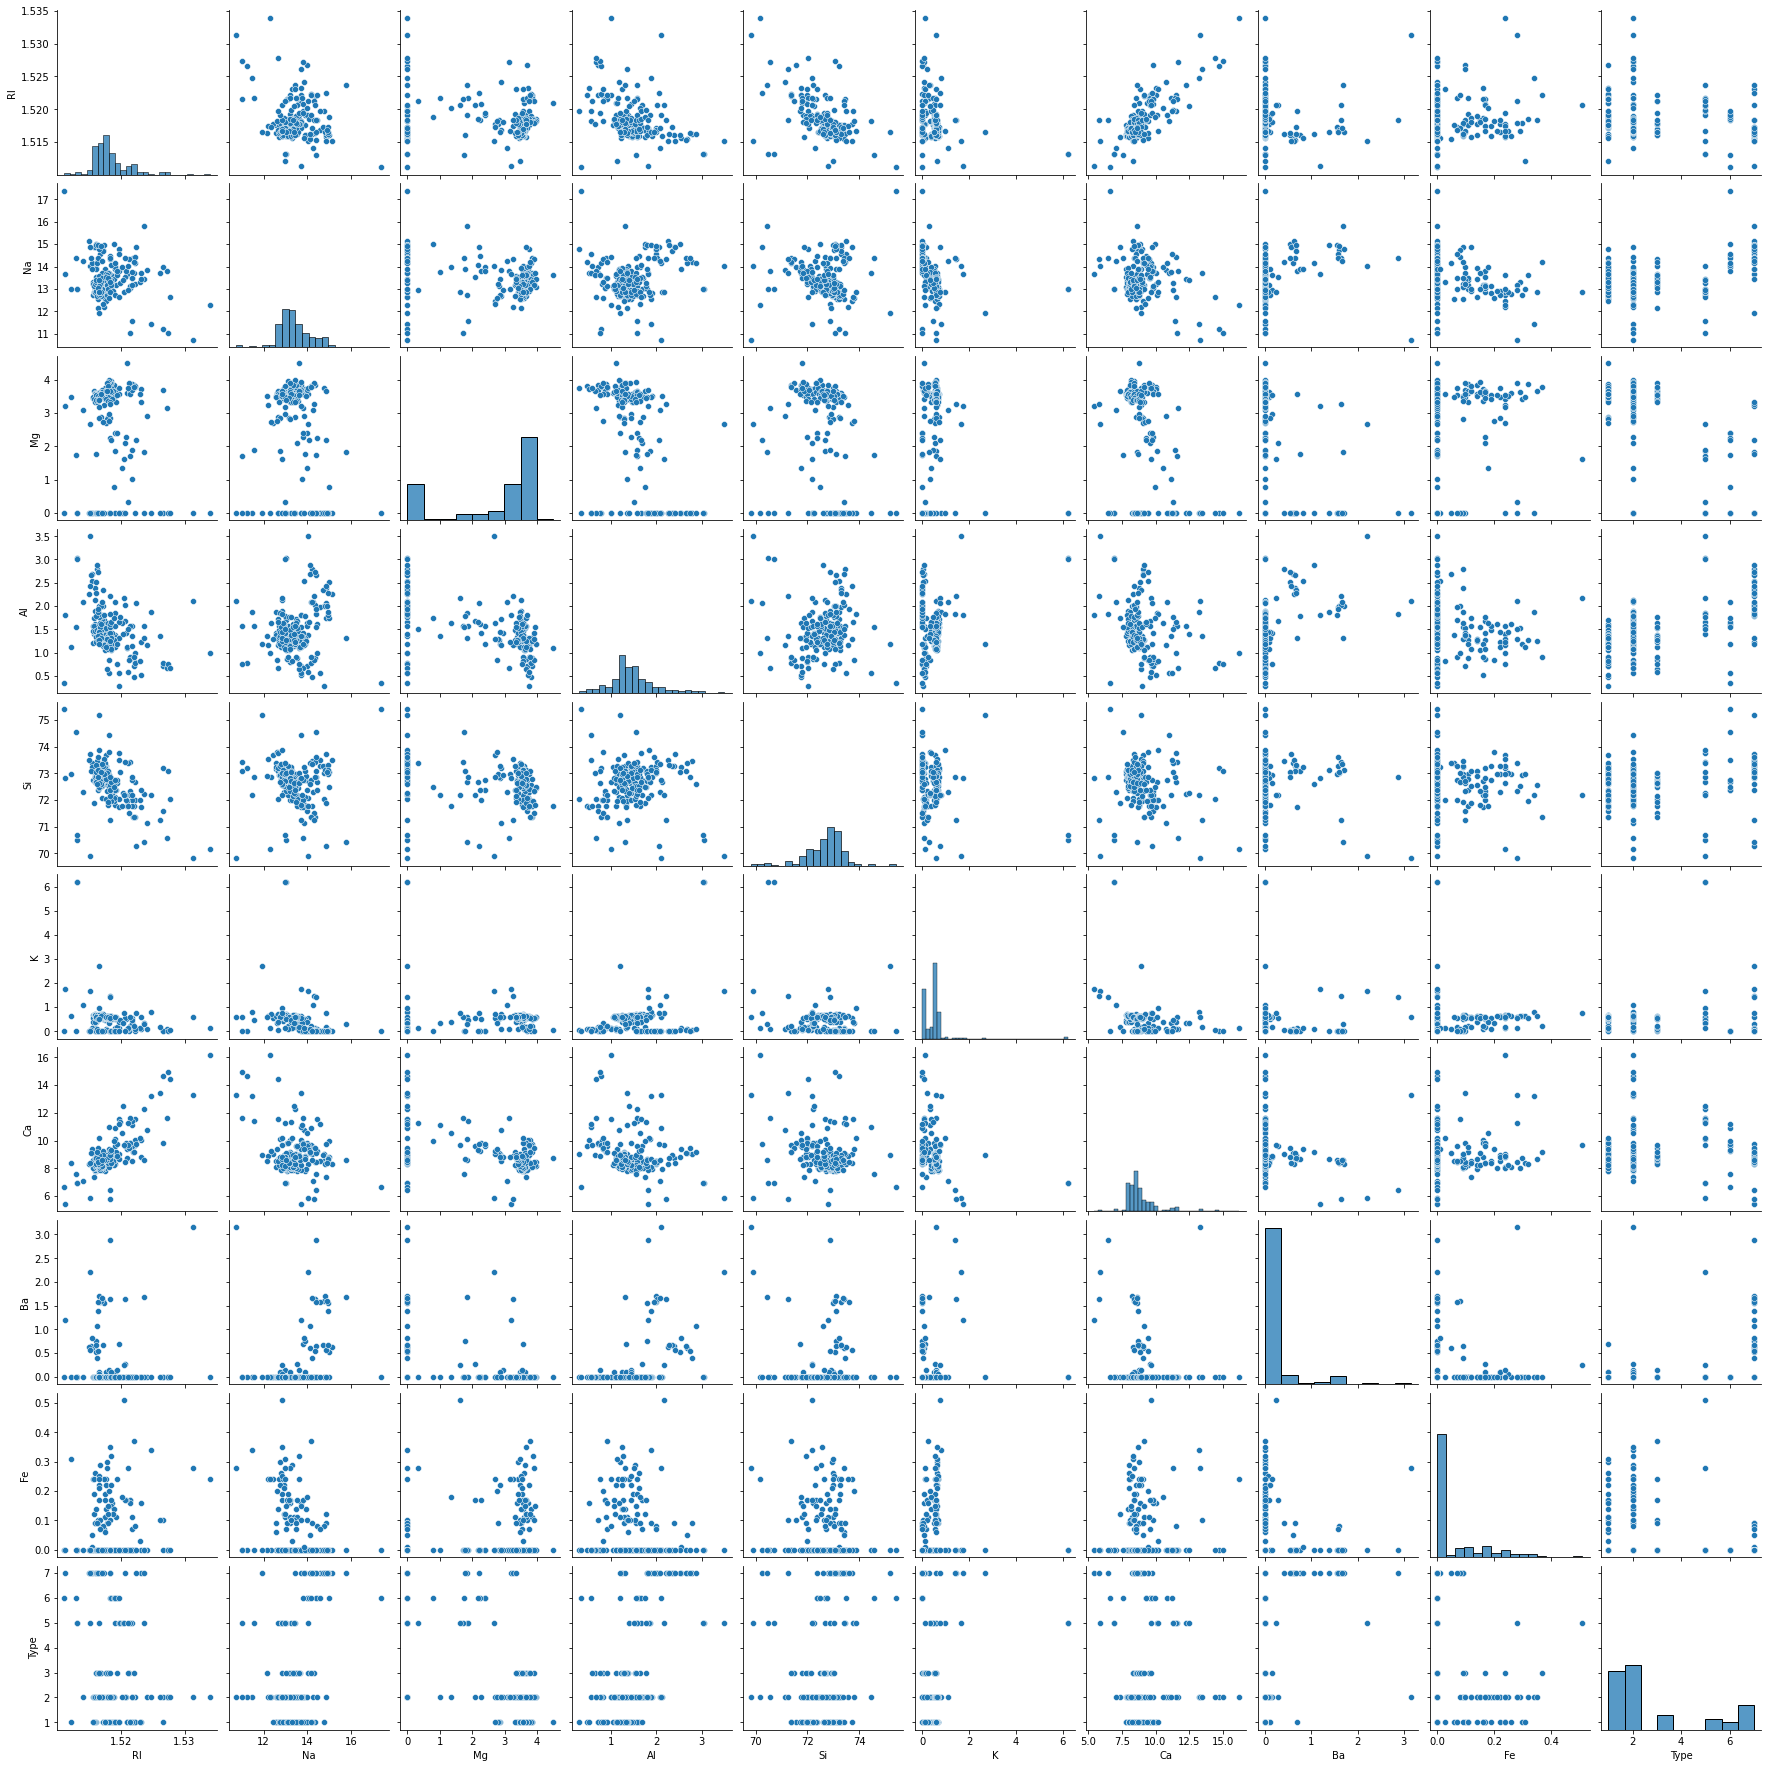

In [12]:
sns.pairplot(glass_data)

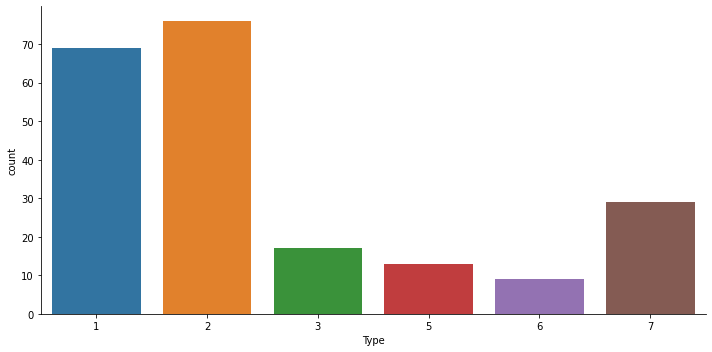

In [13]:
sns.factorplot('Type',data = glass_data,kind = 'count',aspect= 2,size = 5)

In [14]:
glass_data.corr()

RI        Na        Mg        Al        Si         K        Ca  \
RI    1.000000 -0.198802 -0.127526 -0.400973 -0.539000 -0.287645  0.811183   
Na   -0.198802  1.000000 -0.278420  0.167735 -0.064885 -0.264158 -0.278194   
Mg   -0.127526 -0.278420  1.000000 -0.479575 -0.162437  0.007617 -0.446197   
Al   -0.400973  0.167735 -0.479575  1.000000 -0.016195  0.323683 -0.258068   
Si   -0.539000 -0.064885 -0.162437 -0.016195  1.000000 -0.197281 -0.207145   
K    -0.287645 -0.264158  0.007617  0.323683 -0.197281  1.000000 -0.317032   
Ca    0.811183 -0.278194 -0.446197 -0.258068 -0.207145 -0.317032  1.000000   
Ba    0.001679  0.329080 -0.491818  0.480642 -0.104389 -0.043653 -0.112208   
Fe    0.147083 -0.239374  0.085426 -0.080583 -0.097717 -0.009372  0.126314   
Type -0.160140  0.508837 -0.744195  0.597432  0.147725 -0.012455  0.002677   

            Ba        Fe      Type  
RI    0.001679  0.147083 -0.160140  
Na    0.329080 -0.239374  0.508837  
Mg   -0.491818  0.085426 -0.744195  
Al    0.480642 -0.080583  0.597432  
Si   -0.104389 -0.097717  0.147725  
K    -0.043653 -0.009372 -0.012455  
Ca   -0.112208  0.126314  0.002677  
Ba    1.000000 -0.059729  0.574896  
Fe   -0.059729  1.000000 -0.191090  
Type  0.574896 -0.191090  1.000000

<AxesSubplot:>

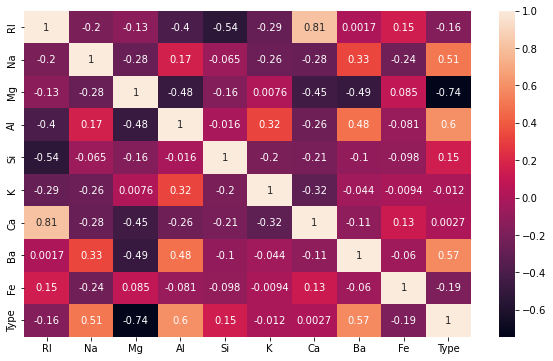

In [15]:
plt.figure(figsize=(10,6))
cor = glass_data.corr()
sns.heatmap(cor,annot=True)

## use standard scalar tech

In [16]:
x = glass_data.drop(columns = 'Type',axis = 1)
y = glass_data[['Type']]

In [17]:
x.head()

RI     Na    Mg    Al     Si     K    Ca   Ba   Fe
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0

In [18]:
y.head()

Type
0     1
1     1
2     1
3     1
4     1

In [19]:
std_data = StandardScaler()
scalar_x = std_data.fit_transform(x)
x_df = pd.DataFrame(scalar_x,columns = x.columns)
x_df

RI        Na        Mg        Al        Si         K        Ca  \
0    0.879840  0.289558  1.257238 -0.706370 -1.133248 -0.673480 -0.143466   
1   -0.243816  0.596403  0.639311 -0.180863  0.097037 -0.028962 -0.790201   
2   -0.716412  0.154546  0.604596  0.182950  0.433746 -0.167073 -0.825349   
3   -0.227291 -0.238216  0.701798 -0.322346 -0.058368  0.109149 -0.516041   
4   -0.306608 -0.164573  0.653197 -0.423405  0.550299  0.078457 -0.621487   
..        ...       ...       ...       ...       ...       ...       ...   
208 -0.699888  0.903249 -1.860172  2.891336 -0.058368 -0.642789  0.158812   
209 -0.494986  1.860605 -1.860172  1.092483  0.524398 -0.765554 -0.389506   
210  0.760865  1.173272 -1.860172  1.153118  0.990612 -0.765554 -0.361387   
211 -0.607351  1.197820 -1.860172  0.991424  1.236668 -0.765554 -0.333268   
212 -0.409059  1.013713 -1.860172  1.274389  0.912909 -0.765554 -0.234852   

           Ba        Fe  
0   -0.353808 -0.588301  
1   -0.353808 -0.588301  
2   -0.353808 -0.588301  
3   -0.353808 -0.588301  
4   -0.353808 -0.588301  
..        ...       ...  
208  1.778672 -0.588301  
209  2.844912 -0.588301  
210  2.945501 -0.588301  
211  2.804676 -0.588301  
212  3.005854 -0.588301  

[213 rows x 9 columns]

In [20]:
x_df.mean()

RI   -1.207381e-14
Na   -3.444298e-15
Mg   -3.544374e-17
Al    8.235457e-17
Si    1.006498e-14
K     1.188408e-16
Ca   -1.209127e-15
Ba    7.297241e-16
Fe   -1.459448e-16
dtype: float64

In [21]:
x_df.std()

RI    1.002356
Na    1.002356
Mg    1.002356
Al    1.002356
Si    1.002356
K     1.002356
Ca    1.002356
Ba    1.002356
Fe    1.002356
dtype: float64

## Model building

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x_df,y,test_size=0.25,random_state=0,stratify=y)

In [23]:
x_train.shape,y_train.shape

((159, 9), (159, 1))

In [24]:
x_test.shape,y_test.shape

((54, 9), (54, 1))

## Model training

In [25]:
knn_model = KNeighborsClassifier(n_neighbors=5,leaf_size=30, metric='manhattan')
knn_model.fit(x_train,y_train)

KNeighborsClassifier(metric='manhattan')

In [26]:
# training data
y_train_pred = knn_model.predict(x_train)

In [27]:
accuracy_score(y_train,y_train_pred)

0.7610062893081762

In [28]:
# testing data
y_test_pred = knn_model.predict(x_test)

In [29]:
accuracy_score(y_test,y_test_pred)

0.7222222222222222

In [30]:
cv_score = []
for i in range(1,26):
    knn = KNeighborsClassifier(n_neighbors=i,metric='manhattan')
    cv_scores = cross_val_score(estimator=knn,X = x_df, y=y,cv=5)
    cv_score.append(cv_scores.mean())
    print('neighbours',i,cv_scores.mean())
    

neighbours 1 0.6428571428571429
neighbours 2 0.6427464008859358
neighbours 3 0.6524916943521595
neighbours 4 0.6477297895902547
neighbours 5 0.6666666666666667
neighbours 6 0.624141749723145
neighbours 7 0.6197120708748617
neighbours 8 0.6197120708748616
neighbours 9 0.6243632336655593
neighbours 10 0.6385382059800665
neighbours 11 0.643078626799557
neighbours 12 0.6197120708748616
neighbours 13 0.6009966777408638
neighbours 14 0.6104097452934663
neighbours 15 0.6011074197120709
neighbours 16 0.6244739756367663
neighbours 17 0.6101882613510521
neighbours 18 0.6197120708748616
neighbours 19 0.6150609080841639
neighbours 20 0.6055370985603543
neighbours 21 0.6198228128460687
neighbours 22 0.6105204872646733
neighbours 23 0.6056478405315615
neighbours 24 0.6057585825027686
neighbours 25 0.5964562569213732


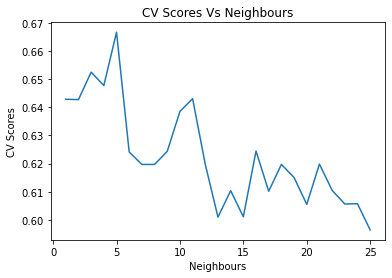

In [31]:
plt.plot(range(1,26),cv_score)
plt.title('CV Scores Vs Neighbours')
plt.xlabel('Neighbours')
plt.ylabel('CV Scores')
plt.show()

## second model

In [32]:
knn_model5 = KNeighborsClassifier(n_neighbors=7,leaf_size=30, metric='manhattan')
knn_model5.fit(x_train,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=7)

In [33]:
# training data
y_train_pred5 = knn_model5.predict(x_train)

In [34]:
accuracy_score(y_train,y_train_pred5)

0.7044025157232704

In [35]:
print(classification_report(y_train,y_train_pred5))

              precision    recall  f1-score   support

           1       0.62      0.84      0.72        51
           2       0.72      0.67      0.69        57
           3       0.50      0.08      0.13        13
           5       0.60      0.60      0.60        10
           6       0.86      0.86      0.86         7
           7       1.00      0.86      0.92        21

    accuracy                           0.70       159
   macro avg       0.72      0.65      0.65       159
weighted avg       0.71      0.70      0.69       159



In [36]:
# testing data
y_test_pred5 = knn_model5.predict(x_test)

In [37]:
accuracy_score(y_test,y_test_pred5)
# 72% accurancy level

0.7222222222222222

In [38]:
print(classification_report(y_test,y_test_pred5))

              precision    recall  f1-score   support

           1       0.68      0.83      0.75        18
           2       0.70      0.74      0.72        19
           3       0.00      0.00      0.00         4
           5       0.50      0.33      0.40         3
           6       1.00      1.00      1.00         2
           7       0.88      0.88      0.88         8

    accuracy                           0.72        54
   macro avg       0.63      0.63      0.62        54
weighted avg       0.67      0.72      0.69        54



In [39]:
# according to accurancy level model 1 gives better prediction result
# knn_model = KNeighborsClassifier(n_neighbors=5,leaf_size=30, metric='manhattan')
# knn_model.fit(x_train,y_train)

# END 